In [75]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [76]:
# load the data
ds = pd.read_csv(r'C:\Users\jayak\OneDrive\Desktop\Data Analytics\Regression Model\mushrooms.csv')

In [77]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [78]:
# using labelenoder to convert the categorical data to numerical data
labelencoder = {}
for col in ds.columns:
    labelencoder[col] = LabelEncoder()
    ds[col]= labelencoder[col].fit_transform(ds[col])
    

In [79]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [80]:
# assigning the features and target variable
X = ds.drop('class', axis=1)
y = ds['class']

In [81]:
# splitting the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
# creating the model
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
# predicting the model
y_pred = model.predict(X_test)

In [84]:
# finding the metrics
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Classification report:', classification_report(y_test,y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)

Accuracy score: 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Axes: >

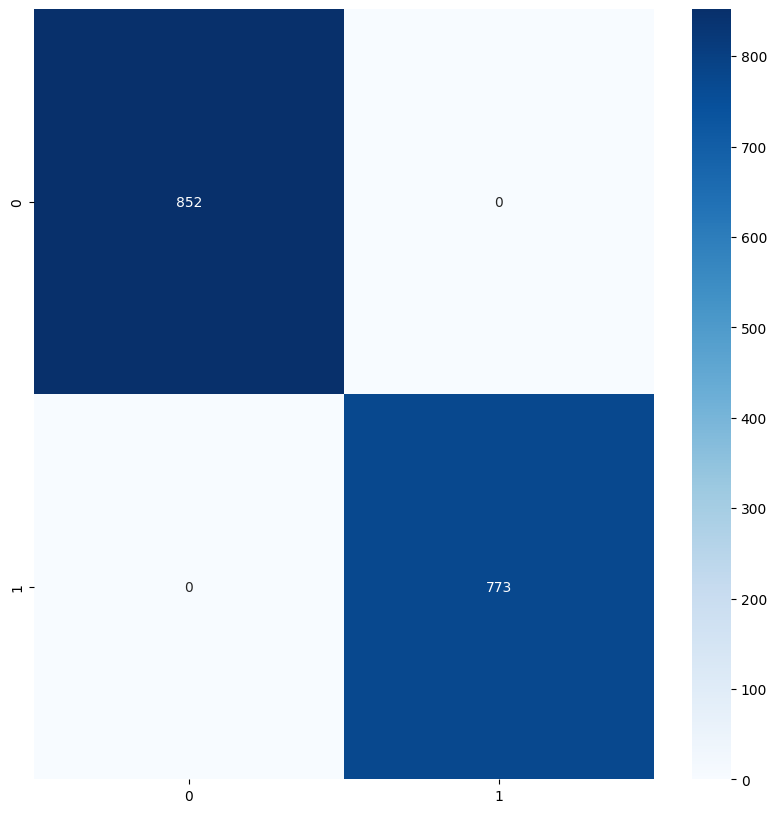

In [85]:
# plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot = True,fmt='d',cmap='Blues')